In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Loading Data

In [2]:
berkshire = pd.read_csv('data/berkshire.csv')
s_p = pd.read_csv('data/s&p.csv')

In [3]:
s_p.head()

,date,close_SP500,high_SP500,low_SP500,open_SP500
0,1997-11-03,1252.959961,1252.959961,1252.959961,1252.959961
1,1997-11-04,1255.329956,1255.329956,1255.329956,1255.329956
2,1997-11-05,1258.180054,1258.180054,1258.180054,1258.180054
3,1997-11-06,1251.969971,1251.969971,1251.969971,1251.969971
4,1997-11-07,1238.199951,1238.199951,1238.199951,1238.199951


In [4]:
berkshire.shape

(6290, 5)

In [5]:
berkshire.max()

date         2022-10-31
close_BRK    359.570007
high_BRK     362.100006
low_BRK      355.529999
open_BRK     361.390015
dtype: object

The data must be analyzed by valuation, the value itself won't matter.

## Analyzing Prices

Text(0.5, 1.0, 'Berkshire Close Prices Hathway Line Chart')

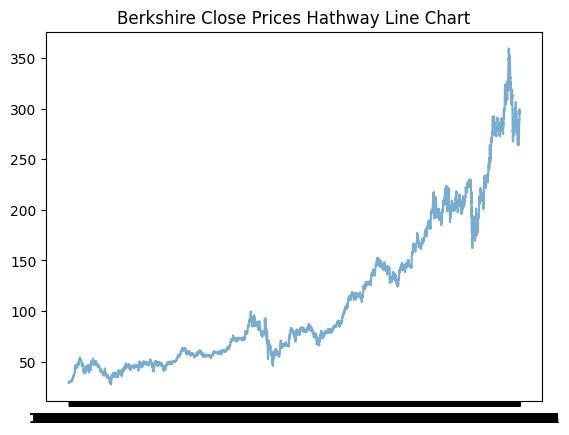

In [6]:
## Line Chart Open vs. Close Prices
y_close_axis = berkshire['close_BRK']
x_axis = berkshire['date']

plt.plot(x_axis,y_close_axis,alpha=0.6)
plt.title("Berkshire Close Prices Hathway Line Chart")

Text(0.5, 1.0, 'S&P Close Prices Line Chart')

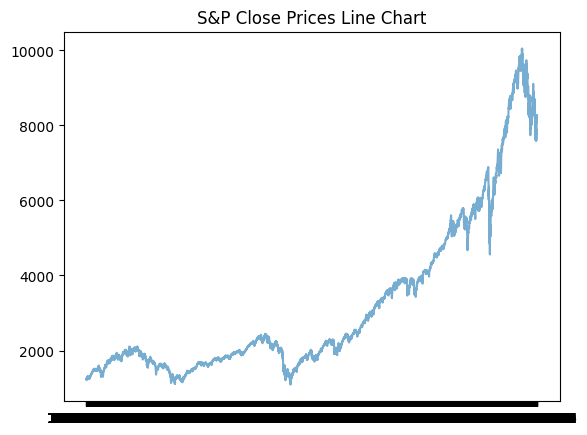

In [7]:
## Line Chart Open vs. Close Prices
y_close_axis = s_p['close_SP500']
x_axis = s_p['date']

plt.plot(x_axis,y_close_axis,alpha=0.6)
plt.title("S&P Close Prices Line Chart")

Text(0.5, 1.0, 'S&P Histogram')

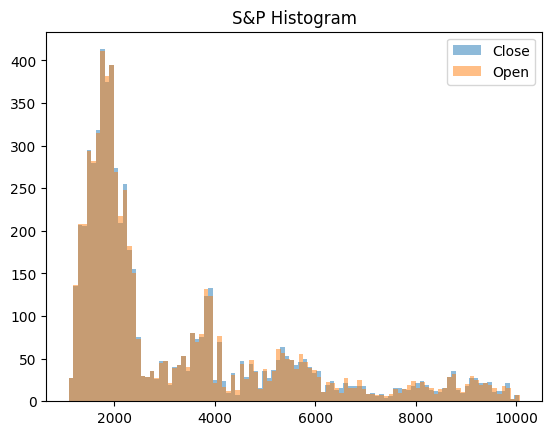

In [8]:
## Histogram
kwargs = dict(alpha=0.5, bins=100)
plt.hist(s_p['close_SP500'],**kwargs, label="Close")
plt.hist(s_p['open_SP500'],**kwargs, label="Open")
plt.legend()
plt.title("S&P Histogram")

### Returns Distribution of both Berkshire and S&P 500

## Histogram

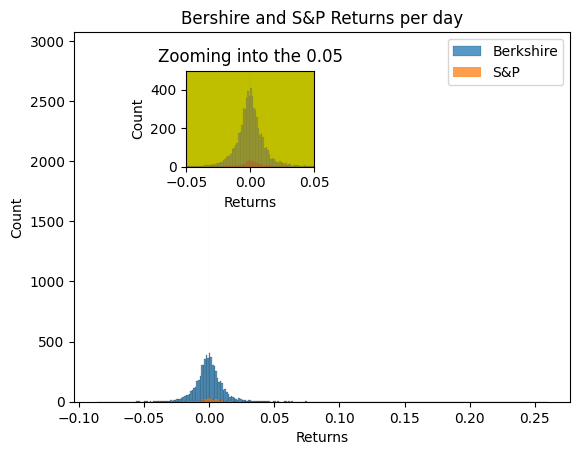

In [34]:
berkshire['Returns'] = (berkshire['close_BRK'] - berkshire['open_BRK']) / berkshire['open_BRK']
sns.histplot(data=berkshire['Returns'], label= "Berkshire")

s_p['Returns'] = (s_p['close_SP500'] - s_p['open_SP500']) / s_p['open_SP500']
sns.histplot(data=s_p['Returns'], label= "S&P")


plt.title('Bershire and S&P Returns per day')
plt.legend()


ax2 = plt.axes([0.3, 0.6, .2, .2], facecolor='y')
sns.histplot(s_p['Returns'], ax=ax2, color='orange')
sns.histplot(berkshire['Returns'], ax=ax2, color="blue", alpha =0.2)
ax2.set_title('Zooming into the 0.05')
ax2.set_xlim([-0.05,0.05])
ax2.set_ylim([0,500])


plt.show()

In [36]:
berkshire['Ticker'] = 'BRK'
s_p['Ticker'] = 'SP500'
df = pd.concat([berkshire, s_p], ignore_index=True)
df = df[['Ticker', 'Returns']]


## Boxplot

Text(0.5, 1.0, 'Berkshire and S&P Returns (No outliers)')

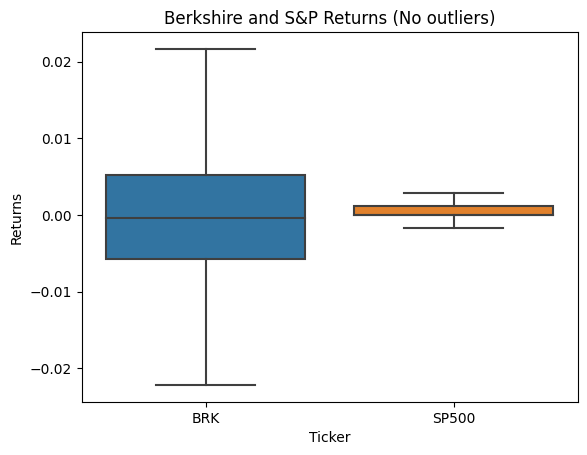

In [39]:
sns.boxplot(x='Ticker', y='Returns', data=df, showfliers = False)
plt.title('Berkshire and S&P Returns (No outliers)')

## Metrics and Statistics of the Data

In [9]:
berkshire.describe()

,close_BRK,high_BRK,low_BRK,open_BRK
count,6290.000000,6290.000000,6290.000000,6290.000000
mean,110.169239,110.972693,109.303883,110.193831
std,73.651772,74.164574,73.121726,73.693133
min,27.400000,28.299999,27.020000,27.840000
25%,55.104999,55.500000,54.825000,55.180000
50%,79.355000,79.884998,78.739998,79.379997
75%,147.735004,148.529999,146.697498,147.855000
max,359.570007,362.100006,355.529999,361.390015


In [10]:
s_p.describe()

,close_SP500,high_SP500,low_SP500,open_SP500
count,6290.000000,6290.000000,6290.000000,6290.000000
mean,3224.032028,3236.920150,3209.128201,3223.553406
std,2159.776846,2175.150073,2142.784668,2159.704065
min,1095.040039,1095.040039,1095.040039,1095.040039
25%,1752.834991,1754.790009,1749.660004,1752.834991
50%,2173.435059,2177.099976,2168.064941,2172.565063
75%,4063.962463,4082.212463,4048.630066,4066.072571
max,10050.410156,10097.299805,10014.480469,10067.740234


In [11]:
print(" Valuation of Berkshire:"+ str(math.ceil(berkshire['close_BRK'].max()/ berkshire['close_BRK'].min()*100)) + "%")
print(" Valuation of S%P Index:"+ str(math.ceil(s_p['close_SP500'].max()/ s_p['close_SP500'].min()*100)) + "%")

 Valuation of Berkshire:1313%
 Valuation of S%P Index:918%
